<a href="https://colab.research.google.com/github/Malaksamer/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/Malak_samer_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Smoking

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/maternal-smoking/smoking.tsv")
df.shape

(610, 20)

In [3]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


## Q1. Does the mom's smoking pattern affect the newborn birth weight?

### Numerically

Let's first see how many different smoking patterns exist in the dataset. We will use the `groupby` function to group the rows (records) in the `DataFrame` by the `smoke` column (variable). Then count the number of different row per each smoking pattern using the `size` function.

In [4]:
df.groupby('smoke').size()

smoke
never              282
now                216
once_not_now        60
until_pregnancy     52
dtype: int64

From the above, we can see that there are four different smoking patterns, `never` (282 rows), `once_not_now` (60 rows), `until_pregnancy` (52 rows), and `now` (216 rows).

Now, let's look at average baby weights for each of these patterns by grouping them and aggregating them by taking `median` of the `weight`.

In [5]:
df.groupby('smoke').agg(Median_Baby_Weight = ('weight', 'median')).reset_index()

,smoke,Median_Baby_Weight
0,never,123.0
1,now,114.5
2,once_not_now,123.5
3,until_pregnancy,124.5


From the table above, we can see that the moms who smoked during pregnancy (`now`) had babies of the lowest birth weight, average of `114.5`.

### Visually

<Axes: xlabel='smoke', ylabel='weight'>

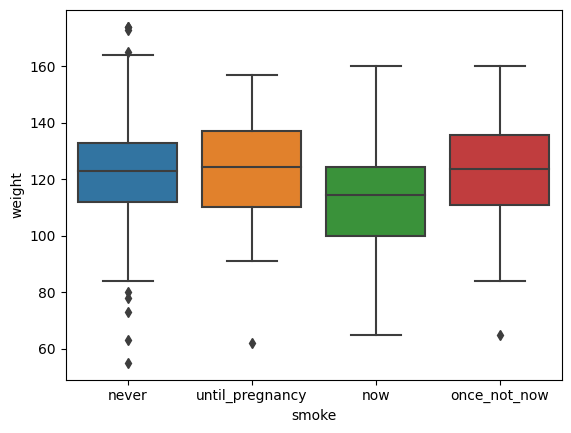

In [6]:
sns.boxplot(data = df, x = 'smoke', y = 'weight')

The effects of maternal smoking on newborn weight are clearly illustrated above.

---

## Q2. Does the mom’s race affect the newborn birth weight?


<Axes: xlabel='mom.race', ylabel='weight'>

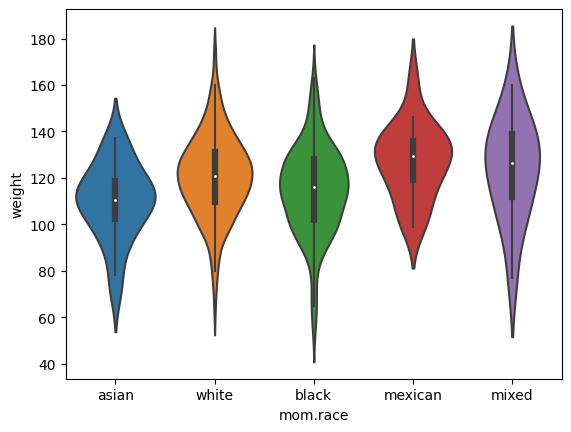

In [7]:
sns.violinplot(x='mom.race',y='weight', data=df)

In [8]:
df.groupby('mom.race').size()

mom.race
asian       24
black      131
mexican     18
mixed       14
white      423
dtype: int64

## Q3. Is there a correlation between the mom’s weight and the baby’s weight?


<Axes: xlabel='mom.weight', ylabel='weight'>

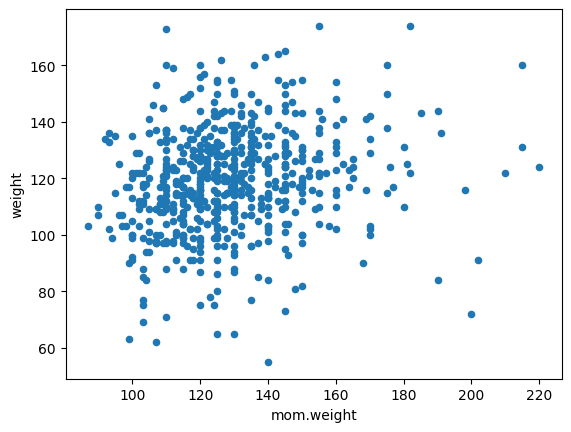

In [12]:
df.plot.scatter(x='mom.weight',y='weight')

<Axes: xlabel='mom.weight', ylabel='weight'>

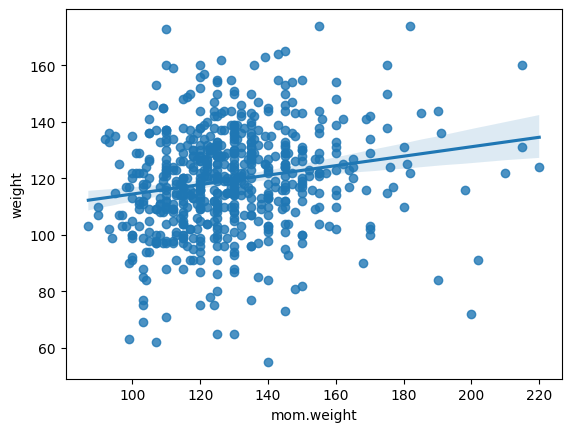

In [13]:
sns.regplot(data=df, x='mom.weight',y='weight')

## Q4. Is there a correlation between the dad’s weight and the baby’s weight?

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='dad.weight', ylabel='weight'>

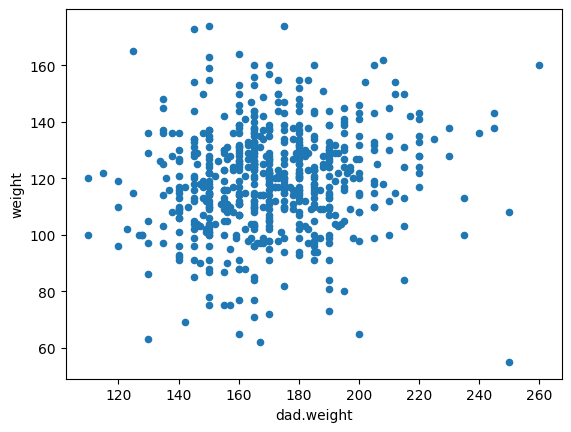

In [14]:
df.plot.scatter(x='dad.weight',y='weight')

<Axes: xlabel='dad.weight', ylabel='weight'>

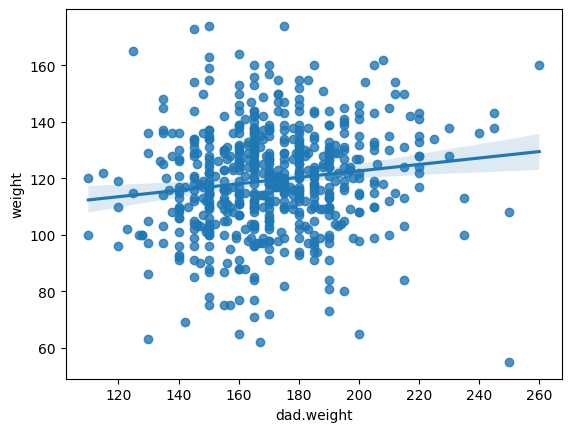

In [15]:
sns.regplot(data=df, x='dad.weight',y='weight')

In [ ]:
there is a weak correlation between dad's weight and the baby's weight

## Q5. From Q3 and Q4, which is a stronger correlation?

In [ ]:
it shows that the moms weight has a stronger correlation to the baby's weight compared to the dad's weight

## Q6. Is there a correlation between the mom’s weight and the dad’s weight?

<Axes: xlabel='dad.weight', ylabel='mom.weight'>

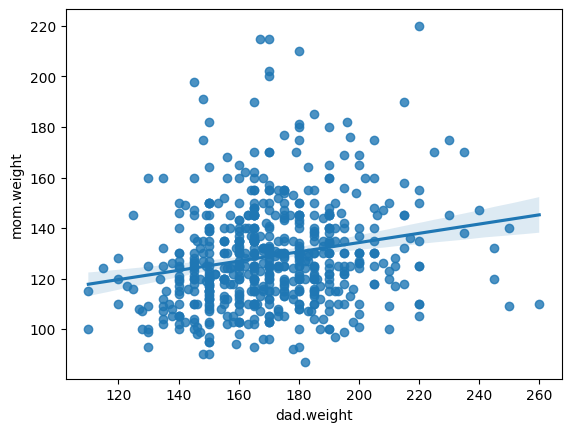

In [17]:
sns.regplot(data=df, x='dad.weight',y='mom.weight')

In [ ]:
it is a weak correlation

## Q7. On average, does the mom’s weight change across the races?

<Axes: xlabel='mom.race', ylabel='mom.weight'>

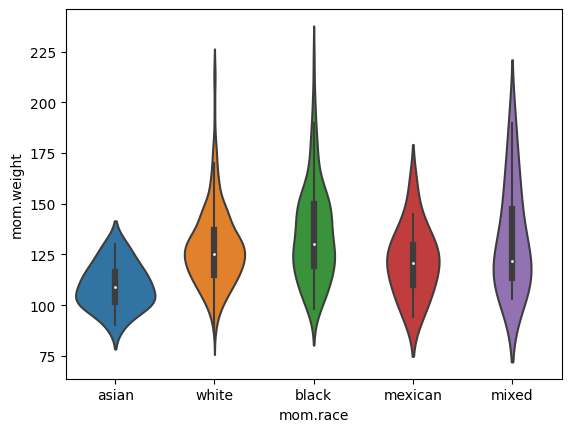

In [18]:
sns.violinplot(data=df, x='mom.race',y='mom.weight')

In [ ]:
yes it is clear that the mom''s weight changes according to race. It shows that asian moms have to the lowets weight, and the rest of the races have an average of 125 weight.

## Q8. Does mom’s smoking pattern change with the mom’s education?

In [19]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


In [26]:
grouped_smoke=df.groupby(['mom.edu','smoke']).size()
grouped_smoke

mom.edu  smoke          
0        never                1
         once_not_now         1
         until_pregnancy      1
1        never               26
         now                 46
         once_not_now         6
         until_pregnancy      7
2        never              103
         now                 90
         once_not_now        14
         until_pregnancy     22
3        never               13
         now                 17
         once_not_now         2
4        never               73
         now                 42
         once_not_now        23
         until_pregnancy     14
5        never               66
         now                 21
         once_not_now        14
         until_pregnancy      8
dtype: int64

In [28]:
counts=df.groupby(['mom.edu','smoke']).size().to_frame('size').reset_index()
counts

,mom.edu,smoke,size
0,0,never,1
1,0,once_not_now,1
2,0,until_pregnancy,1
3,1,never,26
4,1,now,46
5,1,once_not_now,6
6,1,until_pregnancy,7
7,2,never,103
8,2,now,90
9,2,once_not_now,14


<Axes: xlabel='mom.edu', ylabel='size'>

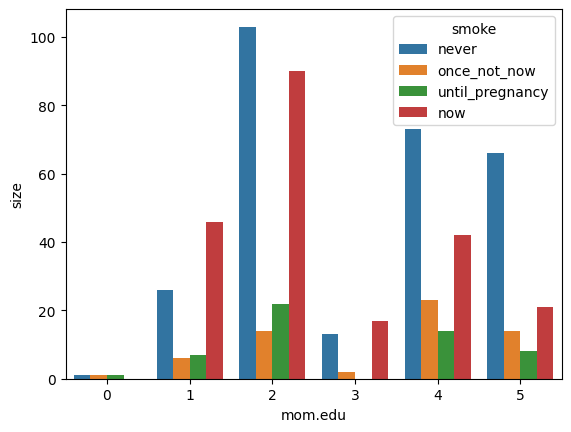

In [31]:

sns.barplot(data=counts,x='mom.edu',y='size',hue='smoke')

## Q9. Does mom’s smoking pattern change with the family income?

<Axes: xlabel='income', ylabel='size'>

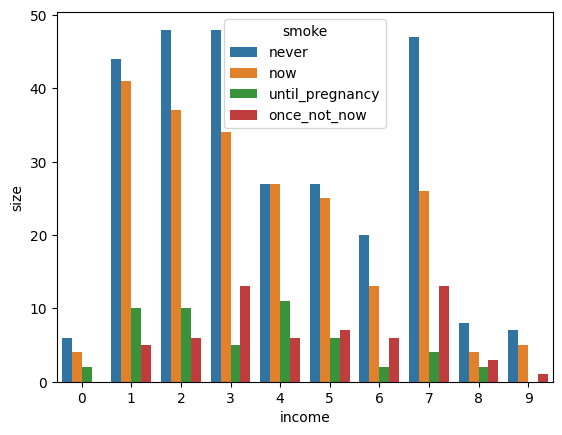

In [33]:
countss=df.groupby(['income','smoke']).size().to_frame('size').reset_index()
sns.barplot(data=countss,x='income',y='size',hue='smoke')

## Q10. Is there a relationship between the mom’s race and the dad’s race?

In [35]:
counts=df.groupby(['mom.race','dad.race']).size().to_frame('size').reset_index()
counts

,mom.race,dad.race,size
0,asian,asian,22
1,asian,white,2
2,black,black,126
3,black,mixed,5
4,mexican,mexican,15
5,mexican,white,3
6,mixed,black,3
7,mixed,mexican,1
8,mixed,mixed,6
9,mixed,white,4


In [39]:
sns.barplot(data=counts,x='mom.race',y='dad.race')

TypeError: ignored